# The 2021 Kaggle Geographic Showdown!



### Which Continent and Country Will Win The 2021 Kaggle Geographic Showdown?!?!

<div style="width:100%;text-align: center;"> <img align=middle  src="http://upload.wikimedia.org/wikipedia/commons/d/d7/Flag-globe-2.gif" width="200">



### Exciting! Let the games begin!

This workbook uses responses from the 2021 Kaggle Machine Learning & Data Science Survey dataset. Using in particular the country response. To analyse which country and continent should win the 2021 Kaggle Survey Geographic Showdown! 

Gold, Silver and Bronze Medals will be rewarded to the countries and continents which perform the best in different metrics, and then the countries and continents which perform the best will be crowned the 2021 Kaggle Geographic Showdown Medallists and Champions! 


Awards Include: 

* Absolute Number of Respondents Award

* Respondents per Capita Award

* Women and LGBTQ+ Inclusivity Award

* Machine Learning Award

* Future Talent Award

* Polyglot Award


Each of these shall be weight equally, to give the Overall 2021 Kaggle Survey Geographic Showdown Champions!

Let the games begin!

This project begins with providing more information on the awards, and methods used. Then the data preparation section, which holds the code on how the awards were calculated, annotated with comments throughout. Then finally the Award Ceremony section begins were the workbook showcases the results.

# Awards Discussion

* Total Respondents Award

This metric shows the total number of respondents to the 2021 Kaggle survey each geographic area had. The metric ranks each area, with merit given to the areas with the highest number of respondents. 

This metric was selected with the hypothesis that a ‘Kaggle hub talent cluster' may bring similar benefits as those documented in research papers about business clusters. 

##### 
*  Respondents per Capita Award

The Respondent per Capita metric was created to the number of 2021 Kaggle survey respondents, for the geographic area population. This metric avoids bias to countries which have a large population.

The metric gives merit to areas that have the highest respondents per head. As this could indicate the area has a high enthusiasm for data!
##### 
* Gender Inclusivity Award

The Gender Inclusivity metric was created to show what areas had the highest number of respondents to the 2021 Kaggle survey that reported their gender as woman, non - binary and prefer to self-describe. 

This metric gave merit to areas which had the highest proportion of respondents that identified as one of those 3 categories. This metric was to countries that had the highest gender inclusivity, as we assumed diversity in the workplace would bring value to the data team. Particularly in the data industry, where bias in models is important. 
##### 
* Machine Learning Award

This metric shows of the respondents for an area stated they had 3+ years of experience using machine learning methods. This method was selected to show areas which have a high proportion of highly talented data expertise. 

This metric gave merit to areas that had the highest proportion of respondents that reported this level of expertise.
##### 
* Future Talent Award

This metric was created to show what areas had the highest number of respondents for that area that were under 25 years old. This metric gave merit to those which had the highest proportion of respondents under the age of 25. 

This metric was created, as areas with a high concentration of young talent, may develop talent of the future. 

##### 
* Polyglot Award

The final metric create was the polyglot award. A polyglot being those which have multiple programming languages skills. This metric gave preference to areas with the highest mean polyglot levels. 

This metric was selected to compare how adaptable the skillset of an area is. Where the metric give merit to areas with the highest mean polyglot level. 
##### 
* Overall, 2021 Kaggle Survey Geographic Showdown Champions

Finally, we reach the stage to analyse who the winners of the overall 2021 Kaggle survey data geographic champions are! How exciting! 

The winners were calculated by adding the rank they scored in each category together, with equal weighting given to each.  With the winner being the areas that scored the overall lowest total score. 

Who shall it be? Keep scrolling to find out! :)


# Methodology Explanation


Before we jump in its time to lay out the nitty-gritty detail of our choice of methods on how this project was completed. Fun. 

This project was completed in python, to allow for reproducible results. 

The result of each award is shown with leader boards. Where each award has its own leader board, and the Overall 2021 Kaggle Geographic Champion leader board is shown at the end. These leader boards show the rank each country achieved in the competition. In total there are 64 countries in the 2021 Kaggle Survey Dataset. The countries which perform the best will rank the highest. Therefore, a rank of 1 show cases they are gold medallist for this award. Each leader board is designed to show-off the gold, silver and bronze awardees with the use of colour. 

Our analysis makes use of sunburst charts, to visualise countries which preform poorly in a particular award. The outside circle of the sunburst shows all the countries, and the inner circle shows the continents. Where the countries with the largest wedge perform the worst. A colour scheme is also used, so that the poorer the ranking the warmer the colour becomes, with dark maroon being the worst ranking. The sunburst charts are used to help visualize countries that have room for improvement 😊.

The project results are also displayed on interactive globes, which were created with Plotly. Where a user can spin and play with the globe to view the results. As well as being fun, the decision to plot the results on a globe was taken to avoid bias. This is due to the cartographic design challenge of plotting the Earth, an ellipsoid object, on a 2D plane such as a piece of paper. As depending on the projection one can increase the look of the size of an area, but on the same effect decrease the size of another. Historically, maps emphasised the United Kingdom, during the British Empire, whilst making countries closer to the equator seem smaller. Bringing bias to how data is represented. Which of course we try to mitigate and to challenge techniques with may induce it. A good book to read on this is ‘How to Lie with Maps’ by Mark Monmonier. For this project we opted to centre the globe on the winning country for the award. 

The project also uses a variety of other types of visualisations throughout, which are explained, as we go. 😊 So let’s go! 


# Part 1 - Import The Dataset

To import the dataset, we did the following:

- Import project libraries
- Import Dataset 'kaggle-survey-2021'
- Import 'population-by-country-2020'
- Create continent and country lookup

Feel free to expand the code to see the details!

In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Import project libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from random import sample
import matplotlib.colors as pltc
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Import Dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
input_data = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
input_data.head(5)

In [ ]:
# Import  Population Data

country_pop = pd.read_csv("/kaggle/input/population-by-country-2020/population_by_country_2020.csv")
country_pop = country_pop[['Country (or dependency)', 'Population (2020)']]
country_pop.columns = ['Country', 'Country_Population']

# rename values to match competition dataset
country_pop['Country'] = country_pop['Country'].replace({'Iran' : 'Iran, Islamic Republic of...',
                        'United States' :  'United States of America',
                        'Vietnam' : 'Viet Nam' ,
                        'United Kingdom' : 'United Kingdom of Great Britain and Northern Ireland',
                        'Czech Republic (Czechia)' : 'Czech Republic' ,
                        'Hong Kong' : 'Hong Kong (S.A.R.)' })

country_pop.head(5)

In [ ]:
# Import  Continent Data

country_list = ['Nigeria','Morocco','Kenya','Ghana','Egypt','Algeria','Tunisia','South Africa','Uganda','Ethiopia','Pakistan','Turkey','Iran, Islamic Republic of...','China','India','Indonesia','Bangladesh','Sri Lanka','Malaysia','Thailand','Japan','Philippines','Viet Nam','South Korea','Taiwan','Saudi Arabia','Nepal','Singapore','United Arab Emirates','Kazakhstan','Iraq','Israel','Hong Kong (S.A.R.)','Russia','Ukraine','Spain','Germany','Austria','United Kingdom of Great Britain and Northern Ireland','Belgium','Portugal','France','Italy','Norway','Poland','Netherlands','Belarus','Greece','Denmark','Czech Republic','Romania','Switzerland','Ireland','Sweden','Canada','United States of America','Mexico','Australia','Brazil','Colombia','Argentina','Chile','Peru','Ecuador']
continent_list = ['Africa','Africa','Africa','Africa','Africa','Africa','Africa','Africa','Africa','Africa','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Asia','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe','North America','North America','North America','Oceania','South America','South America','South America','South America','South America','South America']

georespondent_data = {'Country':country_list,'Continent':continent_list}
georespondent_data = pd.DataFrame.from_dict(georespondent_data)

georespondent_data.head(5)

# Part 2 - Data Prep


To prepare the data, we create the following data frames:

- Respondent level data frame
- Country level results data frame
- Continent level results data frame 
 
Feel free to expand the code to see the step-by-step details of how these were created!


In [ ]:
# Part 2 - Data Prep respondent level 


#Step 1 - Keep only respondent_data pertaining to our metrics. 
respondent_data = input_data[['Q1','Q2', 'Q3','Q4','Q5','Q6','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER', 'Q25', 'Q15']]


# Step 2 - Rename Columns for ease of interpretability 
respondent_data.columns = ['Age_Range', 'Gender', 'Country', 'Education_Level','Work_Title','Coding_Years','Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','Lang_None','Lang_Other', 'USD_Salary','Years_of_ML']


# Step 3 - Remove first row (with question string)
respondent_data = respondent_data.iloc[1: , :]


# Step 4 - Count Polyglot level for ease respondent
lang_cols = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','Lang_None','Lang_Other']
respondent_data[lang_cols] = respondent_data[lang_cols].notna().astype('int')
respondent_data['Polygot_Level'] = respondent_data['Python'] + respondent_data['R'] + respondent_data['SQL'] + respondent_data['C'] + respondent_data['C++'] + respondent_data['Java'] + respondent_data['Javascript'] + respondent_data['Julia'] + respondent_data['Swift'] + respondent_data['Bash'] + respondent_data['MATLAB'] + respondent_data['Lang_None'] + respondent_data['Lang_Other']
respondent_data = respondent_data.drop(lang_cols, axis = 1)


# Step 5 - Drop citizens of the universe i.e. those which respond with "I do not wish to disclose my location"
respondent_data = respondent_data[respondent_data.Country != "I do not wish to disclose my location"]
respondent_data = respondent_data[respondent_data.Country != "Other"]


# Step 6 - Create Continent column by merging with georespondent_data respondent_dataset
respondent_data = pd.merge(respondent_data, georespondent_data, on = "Country", how = "inner")
respondent_data.head(5)

In [ ]:
# Part 2 - Data Prep responent level 


#Step 1 - Keep only respondent_data pertaining to our metrics. 
respondent_data = input_data[['Q1','Q2', 'Q3','Q4','Q5','Q6','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER', 'Q25', 'Q15']]


# Step 2 - Rename Columns for ease of interpretability 
respondent_data.columns = ['Age_Range', 'Gender', 'Country', 'Education_Level','Work_Title','Coding_Years','Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','Lang_None','Lang_Other', 'USD_Salary','Years_of_ML']


# Step 3 - Remove first row (with question string)
respondent_data = respondent_data.iloc[1: , :]


# Step 4 - Count Polyglot level for ease respondent
lang_cols = ['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','Lang_Other']
respondent_data[lang_cols] = respondent_data[lang_cols].notna().astype('int')
respondent_data['Polygot_Level'] = respondent_data['Python'] + respondent_data['R'] + respondent_data['SQL'] + respondent_data['C'] + respondent_data['C++'] + respondent_data['Java'] + respondent_data['Javascript'] + respondent_data['Julia'] + respondent_data['Swift'] + respondent_data['Bash'] + respondent_data['MATLAB'] +  respondent_data['Lang_Other']
respondent_data = respondent_data.drop(lang_cols, axis = 1)


# Step 5 - Drop citizens of the universe i.e. those which respond with "I do not wish to disclose my location" or as "other"
respondent_data = respondent_data[respondent_data.Country != "I do not wish to disclose my location"]
respondent_data = respondent_data[respondent_data.Country != "Other"]


# Step 6 - Create Continent column by merging with georespondent_data respondent_dataset
respondent_data = pd.merge(respondent_data, georespondent_data, on = "Country", how = "inner")


# Step 7 - Create Under 25 column
under_25 = pd.DataFrame({'under_25': ['18-21', '22-24']})
respondent_data['Under_25'] = respondent_data.Age_Range.isin(under_25.under_25).astype('int')


# Step 8 - Create Female and LGBTQ+ Column
female_lgbtq_plus = pd.DataFrame({'female_lgbtq_plus': ['Woman', 'Nonbinary', 'Prefer to self-describe']})
respondent_data['Gender_Inclusive'] = respondent_data.Gender.isin(female_lgbtq_plus.female_lgbtq_plus).astype('int')


# Step 9 - Create 3 year +  Machine Learning Experience Column
respondent_data['Years_of_ML'] =  respondent_data['Years_of_ML'].fillna("I do not use machine learning methods") #  note if respondent has left this blank, one has imputed this as "I do not use machine learning methods"
ML_3year_plus = pd.DataFrame({'ML_3year_plus': ['3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years']})
respondent_data['ML_3year_Plus'] = respondent_data.Years_of_ML.isin(ML_3year_plus.ML_3year_plus).astype('int')


# Step 10 - Save Prepped Respondent Data
prepped_respondent_data = respondent_data[['Country', 'Continent', 'Gender_Inclusive', 'Under_25', 'ML_3year_Plus', 'Polygot_Level']]
prepped_respondent_data.head(5)



In [ ]:
# Create Metrics by Continent

#Step One - Make column aggregations
continent_data = prepped_respondent_data.groupby(['Continent']).agg({ 'Country':'size' , 'Gender_Inclusive' : 'sum', 'Under_25' : 'sum', 'ML_3year_Plus':'sum', 'Polygot_Level':'mean'})
continent_data.reset_index(inplace=True)


# Step Two - Rename columns
continent_data.columns = ['Continent', 'Total_Respondents', 'Total_Gender_Inclusive', 'Total_Under_25', 'Total_ML_3Year_Plus', 'Mean_Polygot_Level']
continent_data['Mean_Polygot_Level'] = round((continent_data['Mean_Polygot_Level']), 2)

# Step Three - Create percentage columns that respondents that represent  each metric
continent_data['Percent_Gender_Inclusive'] = round(((continent_data['Total_Gender_Inclusive'] / continent_data['Total_Respondents']) *100), 2)
continent_data['Percent_Under_25'] = round(((continent_data['Total_Under_25'] / continent_data['Total_Respondents']) *100), 2)
continent_data['Percent_ML_3Year_Plus'] = round(((continent_data['Total_ML_3Year_Plus'] / continent_data['Total_Respondents']) *100), 2)

#Step Four - Create Rank Colummns to view how each Continent performed against the rest

continent_data["Total_Respondents_Rank"] = continent_data["Total_Respondents"].rank(ascending=False) 
continent_data["Gender_Inclusive_Rank"] = continent_data["Percent_Gender_Inclusive"].rank(ascending=False) 
continent_data["Under_25_Rank"] = continent_data["Percent_Under_25"].rank(ascending=False)  
continent_data["ML_3Year_Plus_Rank"] = continent_data["Percent_ML_3Year_Plus"].rank(ascending=False)
continent_data["Polygot_Rank"] = (12 - continent_data["Mean_Polygot_Level"]).rank() 
#floor the result
continent_data["Total_Respondents_Rank"] = np.floor(continent_data["Total_Respondents_Rank"])
continent_data["Gender_Inclusive_Rank"] = np.floor(continent_data["Gender_Inclusive_Rank"])
continent_data["Under_25_Rank"] = np.floor(continent_data["Under_25_Rank"])
continent_data["ML_3Year_Plus_Rank"] = np.floor(continent_data["ML_3Year_Plus_Rank"])
continent_data["Polygot_Rank"] = np.floor(continent_data["Polygot_Rank"])


#Step  5 - Rank the 2021 Kaggle Survey Data Overall Geographic Showdown Country Champions!!! Drumroll... 
continent_data["Continent_Total_Score"] = continent_data["Total_Respondents_Rank"] + continent_data["Gender_Inclusive_Rank"] + continent_data["Under_25_Rank"] + continent_data["ML_3Year_Plus_Rank"] + continent_data["Polygot_Rank"]  # calculate the country score, by adding each rank they recieved for each metric
continent_data["Continent_Award"] = continent_data["Continent_Total_Score"].rank()
continent_data["Continent_Award"] = np.floor(continent_data["Continent_Award"])


# Step 6 - Create Continent Leaderboards

continent_total_respondents_data = continent_data[['Continent' , 'Total_Respondents', 'Total_Respondents_Rank']]
continent_total_respondents_data = continent_total_respondents_data.sort_values(by='Total_Respondents_Rank')
continent_total_respondents_data



continent_gender_inclusive_data = continent_data[['Continent' , 'Total_Respondents', 'Total_Gender_Inclusive', 'Percent_Gender_Inclusive', 'Gender_Inclusive_Rank']]
continent_gender_inclusive_data = continent_gender_inclusive_data.sort_values(by='Gender_Inclusive_Rank')
continent_gender_inclusive_data

continent_under_25_data = continent_data[['Continent' , 'Total_Respondents', 'Total_Under_25', 'Percent_Under_25', 'Under_25_Rank']]
continent_under_25_data = continent_under_25_data.sort_values(by='Under_25_Rank')
continent_under_25_data

continent_ML_3year_plus_data = continent_data[['Continent' , 'Total_Respondents', 'Total_ML_3Year_Plus', 'Percent_ML_3Year_Plus', 'ML_3Year_Plus_Rank']]
continent_ML_3year_plus_data = continent_ML_3year_plus_data.sort_values(by='ML_3Year_Plus_Rank')
continent_ML_3year_plus_data

continent_polygot_data = continent_data[['Continent' , 'Total_Respondents', 'Mean_Polygot_Level', 'Polygot_Rank']]
continent_polygot_data = continent_polygot_data.sort_values(by='Polygot_Rank')
continent_polygot_data

continent_final_leaderboard = continent_data[['Continent' , 'Total_Respondents_Rank', 'Gender_Inclusive_Rank', 'Under_25_Rank', 'ML_3Year_Plus_Rank', 'Polygot_Rank', 'Continent_Total_Score', 'Continent_Award']]
continent_final_leaderboard = continent_final_leaderboard.sort_values(by='Continent_Award')
continent_data

In [ ]:
# Create Metrics by Country

#Step 1 - Make column aggregations
country_data = prepped_respondent_data.groupby(['Country']).agg({ 'Continent':'size' , 'Gender_Inclusive' : 'sum', 'Under_25' : 'sum', 'ML_3year_Plus':'sum', 'Polygot_Level':'mean'})
country_data.reset_index(inplace=True)



# Step 2 - Rename columns
country_data.columns = ['Country', 'Total_Respondents', 'Total_Gender_Inclusive', 'Total_Under_25', 'Total_ML_3Year_Plus', 'Mean_Polygot_Level']
country_data['Mean_Polygot_Level'] = round((country_data['Mean_Polygot_Level']), 3)


# Step 3 - Create Population column
country_data = pd.merge(country_data, country_pop, on = "Country", how = "inner")


# Step 4 - Create percentage columns that respondents that represent  each metric
country_data['Respondents_per_Capita'] = country_data['Total_Respondents'] / country_data['Country_Population']
country_data['Percent_Gender_Inclusive'] = round(((country_data['Total_Gender_Inclusive'] / country_data['Total_Respondents']) *100), 2)
country_data['Percent_Under_25'] = round(((country_data['Total_Under_25'] / country_data['Total_Respondents']) *100), 2)
country_data['Percent_ML_3Year_Plus'] = round(((country_data['Total_ML_3Year_Plus'] / country_data['Total_Respondents']) *100), 2)


#Step 5 - Create Rank Colummns to view how each country performed against the rest

max_country_repondents = country_data['Total_Respondents'].max()

country_data["Total_Respondents_Rank"] = country_data["Total_Respondents"].rank(ascending=False) 
country_data["Respondents_per_Capita_Rank"] = country_data["Respondents_per_Capita"].rank(ascending=False) 
country_data["Gender_Inclusive_Rank"] = country_data["Percent_Gender_Inclusive"].rank(ascending=False) 
country_data["Under_25_Rank"] = country_data["Percent_Under_25"].rank(ascending=False) 
country_data["ML_3Year_Plus_Rank"] = country_data["Percent_ML_3Year_Plus"].rank(ascending=False) 
country_data["Polygot_Rank"] = (12 - country_data["Mean_Polygot_Level"]).rank() 

#floor the result
country_data["Total_Respondents_Rank"] = np.floor(country_data["Total_Respondents_Rank"])
country_data["Gender_Inclusive_Rank"] = np.floor(country_data["Gender_Inclusive_Rank"])
country_data["Under_25_Rank"] = np.floor(country_data["Under_25_Rank"])
country_data["ML_3Year_Plus_Rank"] = np.floor(country_data["ML_3Year_Plus_Rank"])
country_data["Polygot_Rank"] = np.floor(country_data["Polygot_Rank"])


#Step  6 - Rank the 2021 Kaggle Survey Data Overall Geographic Showdown Country Champions!!! Drumroll... 
country_data["Country_Total_Score"] = country_data["Total_Respondents_Rank"] + country_data["Respondents_per_Capita_Rank"] + country_data["Gender_Inclusive_Rank"] + country_data["Under_25_Rank"] + country_data["ML_3Year_Plus_Rank"] + country_data["Polygot_Rank"]  # calculate the country score, by adding each rank they recieved for each metric
country_data["Country_Award"] = country_data["Country_Total_Score"].rank()
country_data["Country_Award"] = np.floor(country_data["Country_Award"])

country_data.head(5)

#Step 7 - Create Continent Lookup
country_data = pd.merge(country_data, georespondent_data, on = "Country", how = "inner")



# Step 7 - Create Country Leaderboards

country_total_respondents_data = country_data[['Total_Respondents_Rank', 'Country' , 'Total_Respondents']]
country_total_respondents_data = country_total_respondents_data.sort_values(by='Total_Respondents_Rank')
country_total_respondents_data

country_respondents_per_Capita_data = country_data[['Respondents_per_Capita_Rank', 'Country' , 'Total_Respondents', 'Country_Population', 'Respondents_per_Capita']]
country_respondents_per_Capita_data = country_respondents_per_Capita_data.sort_values(by='Respondents_per_Capita_Rank')
country_respondents_per_Capita_data

country_gender_inclusive_data = country_data[['Gender_Inclusive_Rank', 'Country' , 'Total_Respondents', 'Total_Gender_Inclusive', 'Percent_Gender_Inclusive']]
country_gender_inclusive_data = country_gender_inclusive_data.sort_values(by='Gender_Inclusive_Rank')
country_gender_inclusive_data

country_under_25_data = country_data[['Under_25_Rank', 'Country' , 'Total_Respondents', 'Total_Under_25', 'Percent_Under_25']]
country_under_25_data = country_under_25_data.sort_values(by='Under_25_Rank')
country_under_25_data

country_ML_3year_plus_data = country_data[['ML_3Year_Plus_Rank', 'Country' , 'Total_Respondents', 'Total_ML_3Year_Plus', 'Percent_ML_3Year_Plus']]
country_ML_3year_plus_data = country_ML_3year_plus_data.sort_values(by='ML_3Year_Plus_Rank')
country_ML_3year_plus_data

country_polygot_data = country_data[['Country' , 'Total_Respondents', 'Mean_Polygot_Level', 'Polygot_Rank']]
country_polygot_data = country_polygot_data.sort_values(by='Polygot_Rank')
country_polygot_data

final_leaderboard = country_data[['Country_Award', 'Country' , 'Total_Respondents_Rank', 'Respondents_per_Capita_Rank', 'Gender_Inclusive_Rank', 'Under_25_Rank', 'ML_3Year_Plus_Rank', 'Polygot_Rank', 'Country_Total_Score']]
final_leaderboard = final_leaderboard.sort_values(by='Country_Award')

country_data.head(5)


In [ ]:
#Import gapminder data (for iso_alpha data)
gapminder = px.data.gapminder().query("year==2007")
gapminder_data = gapminder[['country', 'iso_alpha']]
gapminder_data.columns = ['Country', 'iso_alpha']


#Step 2 - Add missing data
russia = {'Country':'Russia', 'iso_alpha':'RUS'}
uae = {'Country': 'United Arab Emirates', 'iso_alpha':'ARE'}
ukraine = {'Country': 'Ukraine', 'iso_alpha':'UKR'}
belarus = {'Country': 'Belarus', 'iso_alpha':'BLR'}
kazakhstan = {'Country': 'Kazakhstan', 'iso_alpha':'KAZ'}

gapminder_data = gapminder_data.append(russia, ignore_index=True)
gapminder_data = gapminder_data.append(uae, ignore_index=True)
gapminder_data = gapminder_data.append(ukraine, ignore_index=True)
gapminder_data = gapminder_data.append(belarus, ignore_index=True)
gapminder_data = gapminder_data.append(kazakhstan, ignore_index=True)

#Step 3 - Rename to match competition data

gapminder_data['Country'] = gapminder_data['Country'].replace({'Iran' : 'Iran, Islamic Republic of...',
                        'United States' :  'United States of America',
                        'Vietnam' : 'Viet Nam' ,
                        'United Kingdom' : 'United Kingdom of Great Britain and Northern Ireland',
                        'Korea, Rep.':'South Korea',
                        'Hong Kong, China' : 'Hong Kong (S.A.R.)' })
geodata = pd.merge(final_leaderboard, gapminder_data, on = "Country", how = "inner")
geodata.head(5)



# Part 3 - The Awards Ceremony!





<div style="color:turquoise;
           display:fill;
           border-radius:5px;
           background-color:turquoise;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:turquoise;">

</p>
</div>

# Total Respondents Award

<div style="width:100%;text-align: center;"> <img align=middle  src="http://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Kaggle_logo.png/640px-Kaggle_logo.png" width="200">
    

The first award will go to the country and continent with the highest number of total respondents. The award was created to give credit to countries with the most absolute respondents.  With gold medal position (rank 1) being awarded to the country with the most respondents. Hence the higher the rank the worse a country has performed. Just like golf! 😊 

 A report by Stitch Data stated that globally around 11,4000 data scientists are currently employed by companies on LinkedIn with around 60,2000 associated records of professional experiences and an estimate of 254,600 records of skills within data science. Lets see how this is reflected in the 2021 Kaggle Survey!

The country response was taken from the survey question “In which country do you currently reside?”. Where the respondents were given a list of countries to select from. However, not all countries in the world were listed here, therefore some answered with “Other”, and some respondents did not provide a response. Therefore, we referred to these respondents as Citizens of The Universe! And excluded them from our analysis. 
Each country was then matched to a continent. With countries that have areas which fall into two continents, such as Russia. To avoid overcounting we made the decision to allocate the country to the continent where the majority of the country’s landmass lied. As we did not have further details into the area of the country the respondents report to be in. 

The Sankey Diagram below shows the total number of respondents of the Kaggle Survey per continent and country! There are 6 Continents represented within the diagram: Africa, Asia, Europe, North America, Oceania, and South America. The Sankey Diagram shows the total number of respondents in each continent and country. Fascinating! The plot is interactive, like all in our analysis. This means that if you hover your mouse over different sections of this diagram more information is revealed. Please hover over and play about to find out further details of the countries!



In [ ]:
# Create Sankey Diagram showing total repondents in each continent

# Step 1 - Create Sankey data
sankeydata = country_data[['Country', 'Continent', 'Total_Respondents']]

# Step 2 -  Create continent code and colour lookup
contintent_list = ['Africa','Asia','Europe','North America','Oceania','South America']
continent_color_list = ['coral','lightpink','paleturquoise','palegoldenrod','mediumpurple', 'aquamarine']
continent_code_list = [0,1,2,3,4,5]
color_lookup = {'Continent':contintent_list,'Link_Color':continent_color_list, 'Continent_Code': continent_code_list}
color_lookup = pd.DataFrame.from_dict(color_lookup)
sankeydata = pd.merge(sankeydata, color_lookup, on = "Continent", how = "inner")


# Step 3 - Sort
sankeydata = sankeydata.sort_values(by='Continent_Code', ascending = True)
 
# Step 4 - Create country code
sankeydata['Country_Code'] = range(6, 70)

# Step 5 - Create country code
sankeydata.sort_values(['Country','Total_Respondents'],ascending=False).groupby('Continent').head(3)

#  Step 6 - Create Link lists
link_country_list = sankeydata['Continent_Code'].values.tolist()
link_continent_list = sankeydata['Country_Code'].values.tolist()
link_total_respondents = sankeydata['Total_Respondents'].values.tolist()
link_color = sankeydata['Link_Color'].values.tolist()

#  Step 7 - Create node lists 
country_list = sankeydata['Country'].values.tolist()
node_area_list = contintent_list
for i in country_list:
     node_area_list.append(i)

#  Step 8 - Create node colour list
node_color_list = ['coral','lightpink','paleturquoise','palegoldenrod','mediumpurple', 'aquamarine', 'palevioletred', 'chocolate','moccasin', 'snow','forestgreen','indianred','mediumturquoise','brown','mintcream','oldlace','paleturquoise','crimson','coral','orange', 'lightsalmon','floralwhite','lavenderblush','limegreen','palegreen','hotpink','purple','blue','peachpuff','midnightblue','darkmagenta','lightyellow','salmon','tan','lightslategray','slategrey','rosybrown','cornflowerblue', 'mediumorchid', 'lemonchiffon', 'violet', 'chartreuse','green','powderblue', 'darkblue','darkorchid','thistle','dodgerblue','antiquewhite','mediumslateblue', 'darkred','lightblue','darkgoldenrod', 'seagreen', 'darkkhaki', 'mediumvioletred', 'darkcyan', 'lightsteelblue', 'wheat', 'greenyellow', 'darkseagreen', 'beige', 'indigo', 'honeydew', 'darkgrey', 'lavender', 'lightgray', 'deeppink', 'mediumblue', 'azure']
node = {'Country':node_area_list,'Node_Color':node_color_list}

#  Step 9 - Create node df
node = pd.DataFrame.from_dict(node)
node['Node_Code'] = range(0, 70)


#  Step 10 - Create Plot 
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label =  node['Country'].dropna(axis=0, how='any'),
      color = node_color_list

    ),
    link = dict(
      source = link_country_list, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = link_continent_list,
      value = link_total_respondents,
      color = link_color))])

fig.update_layout(title_text="Sankey Diagram Showing Total Repondents from Each Continent", font_size=10, height =1000)

#  Step 11 - Show Plot 
fig.show()



The gold medal in this award goes to India with over 7400 respondents! 

We can see from the diagram above that Africa has 10 countries within the dataset. With Nigeria being the African country with the largest number of respondents, at 702!

Out of the 20 European countries in the dataset, The United Kingdom of Great Britain and Northern Ireland has the highest total number of respondents at 550!

The United States of America has the second highest number of respondents globally at around 2650. The highest number of respondents from any of the three countries within North America!

South America has 5 countries within the dataset, with Brazil containing the highest number of respondents with 751.

Oceania has only one country with data included in the survey, Australia, with 264 respondents. This understandably means this continent has the lowest number of respondents over all continents. 

##### 


The Sunburst Chart below focuses on the ranking of the award each country received. It highlights the most concerning countries and continents in terms of the total number of respondents in the 2021  Kaggle Survey dataset. Where one can see Ethiopia and Iraq perform the worst in this award. 

In [ ]:
# Sunburst Chart Total Respondents

df = country_data
df = df.rename(columns={'Total_Respondents_Rank': 'Total Respondents Rank '})
fig = px.sunburst(df, path= ['Continent','Country'], values='Total Respondents Rank ',
                  color='Total Respondents Rank ', hover_data=['Country'], title = "Sunburst Chart - Total Respondents Award",
                  color_continuous_scale='Turbo')
                  
fig.show()

Now, to view the leader board to view all the data how each country ranked in the Total Respondents Award!  

In [ ]:
# Create Total Respondent Country Leaderboard

country_total_respondents_data['color'] =  np.where((country_total_respondents_data['Total_Respondents_Rank'] ==1),'gold','whitesmoke') 
country_total_respondents_data['color'] =  np.where((country_total_respondents_data['Total_Respondents_Rank'] ==2),'silver',country_total_respondents_data['color']) 
country_total_respondents_data['color'] =  np.where((country_total_respondents_data['Total_Respondents_Rank'] ==3),'burlywood',country_total_respondents_data['color']) 

header = ['Total Respondents Award Rank', 'Country', 'Total Respondents']

fig = go.Figure(data=[go.Table(
    header=dict(values=header,fill_color='turquoise',align='center', font=dict(color='black', size=12)),

    cells=dict(values=[country_total_respondents_data.Total_Respondents_Rank, country_total_respondents_data.Country, country_total_respondents_data.Total_Respondents],
               fill_color=[country_total_respondents_data.color],align='center'))
])

fig.show()

From the Leader board, our gold medal for the Total Respondents Award goes to India with overall 7,434 respondents in the Kaggle Surveys. The silver medal goes to the United States of America with 2,650 respondents and Japan has the bronze medal with 921 respondents. Each country can be seen in the globe below:

In [ ]:
# Plot 3D Globe - Total Respondents
fig = px.choropleth(geodata, locations="iso_alpha",
                    color="Total_Respondents_Rank", 
                    hover_name="Country", 
                    title="Total Respondents Award Rankings",  labels={'Total_Respondents_Rank': 'Total Respondents Award Ranking'}, 
                    color_continuous_scale=px.colors.diverging.Temps)


fig.update_geos(projection_type="orthographic", projection_rotation=dict(lon=78, lat=15, roll=0), showocean = True , showlakes = True, showrivers = True,rivercolor = 'turquoise',oceancolor = 'turquoise',lakecolor = 'turquoise',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()



<div style="color:yellow;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:yellow;">

</p>
</div>

# Respondents Per Capita Award



<div style="width:100%;text-align: center;"> <img align=middle  src="https://freesvg.org/img/population.png" width="200">
    

The Respondent per Capita metric was made by dividing the total number of respondents by the country’s population, taken from a dataset available in Kaggle. This award was created to give merit to areas which have a high enthusiasm for data! This metric also avoids bias to countries which have a large population. 

According to Analytics Insight, the demand for data science professionals in countries such as the United States, China, United Kingdom, Sweden, and India is significant. This award will help explore these countries and continents to provide a better understanding of the supply of data science skills worldwide. 

The Bubble Chart below represents the number of respondents per capita, for each country. Like every plot, this is interactive which means that you can zoom in and hover your mouse to find out more details! The colour of each bubble represents the continent it belongs to. And the larger the size of bubble, shows the larger the respondents’ per capita value is. 


In [ ]:
# Bubble Chart - Respondents per Capita
fig = px.scatter(country_data, x="Country_Population", y="Total_Respondents",
         size="Respondents_per_Capita", color="Continent", title = "Bubble Chart - Respondents per Capita",
                 hover_name="Country", labels={ "Country_Population": "Country Population", "Total_Respondents": "Total Respondents",
                     "Respondents_per_Capita": "Respondents per Capita", "Respondents_per_Capita":"Respondents per Capita"})
fig.show()

From the Bubble Chart above we can see Singapore has the highest respondents’ per capita value of 0.000031 of its population completing the survey! This means 182 people out of their population of over 5.58 million submitted the survey. Although this is a very small percentage it is the top performing country. The country with the lowest respondent’s per capita value is Ethiopia with 0.000000372 of their population of 115.43 million completing the 2021 Kaggle Survey data. We can see all countries of concern in the Sunburst Chart below:

In [ ]:
# Sunburst Chart - Respondents per Capita Award
df = country_data
df = df.rename(columns={'Respondents_per_Capita_Rank': 'Respondents per Capita Rank '})
fig = px.sunburst(df, path=['Continent','Country'], values='Respondents per Capita Rank ',
                  color='Respondents per Capita Rank ', hover_data=['Country'],
                  title = "Sunburst Chart - Respondents per Capita Award",
                  color_continuous_scale='Turbo')

fig.show()

The lowest ranking countries for the Respondents per Capita Award are shown in maroon and dark red in the Sunburst chart above. Ethiopia, China and the Philippines are the most concerning. With Africa and Asia being the continents, which overall perform the most poorly. 

The leader board below allows you to view how each country performed in this award!


In [ ]:
# Create Respondents per Capita Country Leaderboard

df = country_respondents_per_Capita_data
df['color'] =  np.where((df['Respondents_per_Capita_Rank'] ==1),'gold','whitesmoke') 
df['color'] =  np.where((df['Respondents_per_Capita_Rank'] ==2),'silver',df['color']) 
df['color'] =  np.where((df['Respondents_per_Capita_Rank'] ==3),'burlywood',df['color']) 

header = ['Respondents per Capita Award Rank', 'Country', 'Total Respondents', 'Country Population', 'Respondents per Capita']

fig = go.Figure(data=[go.Table(
    header=dict(values=header,fill_color='yellow',align='center', font=dict(color='black', size=12)),

    cells=dict(values=[df.Respondents_per_Capita_Rank, df.Country, df.Total_Respondents, df.Country_Population, df.Respondents_per_Capita],
               fill_color=[df.color],align='center'))
])

fig.show()

The gold medal for the Respondents per Capita Award goes to Singapore with  0.000031 of their population completed the Kaggle survey! The silver medal goes to Ireland, and the bronze goes to Israel. 😊 

These rankings can be view in the globe below:


In [ ]:
# Plot 3D Globe - Respondents per Capita
fig = px.choropleth(geodata, locations="iso_alpha",
                    color="Respondents_per_Capita_Rank",
                    hover_name="Country", 
                    title="Respondents Per Capita Award Rankings", labels={'Respondents_per_Capita_Rank': 'Respondents per Capita Award Ranking'}, 
                    color_continuous_scale=px.colors.diverging.Temps)


fig.update_geos(projection_type="orthographic", projection_rotation=dict(lon=104, lat=1, roll=0), showocean = True , showlakes = True, showrivers = True,rivercolor = 'yellow',oceancolor = 'yellow',lakecolor = 'yellow',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()


<div style="color:fuchsia;
           display:fill;
           border-radius:5px;
           background-color:fuchsia;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:fuchsia;">

</p>
</div>

#  Gender Inclusivity Award



<div style="width:100%;text-align: center;"> <img align=middle  src="https://www.advocate.com/sites/default/files/styles/amp_metadata_content_image_min_696px_wide/public/prideflag.png" width="200">

The Gender Inclusivity metric was created to show what areas had the highest proportion of its respondents that reported their gender as either “woman”, “non – binary” or “prefer to self-describe”.

The World Economic Forum’s 2020 Global Gender Gap Report discuss how their findings reveals that women make up only 26% of professionals in Data and AI. 
 
This award gives merit to areas that have the highest proportion of respondents that identified as one of those 3 categories. We gave merit to countries that have the highest gender inclusivity, as we assumed diversity in the workplace would bring value to the data team and help challenge potential bias in models.

The data for this award was collected from a question stating, “What is your gender?”, where the following options were able to be selected from a list: Man, Woman, Prefer not to say, Nonbinary and Prefer to self-describe.  We are aware survey respondents may identify from other genders were not available in the survey list, such as Gender Fluid and Transgender. Therefore, unfortunately bias is inherited from this survey.

The Bubble chart belows shows how each country performed in this metric.


In [ ]:
# Bubble Chart Gender Award 
fig = px.scatter(country_data, x="Percent_Gender_Inclusive", y="Total_Respondents",
         size="Percent_Gender_Inclusive", color="Continent", title = "Bubble Chart - Gender Inclusivity  Award",
                 hover_name="Country", size_max=15, labels={ "Country_Population": "Country Population", "Total_Respondents": "Total Respondents",
                     "Percent_Gender_Inclusive": "Percentage of Respondents Which Identify as either 'Woman', 'Non - Binary' or 'Prefer to Self-Describe'.","Gender_Inclusive_Rank":"Gender Inclusive Rank"})
fig.show()

In the bubble chart above, we can see that The Gold medal for the Gender Inclusivity Award goes to Tunisia! :)With 38.53% of the respondents in the survey identifying as a woman, non - binary or prefer to self-describe.

 The Silver medal is awarded to Sri Lanka for 33.96% of its  respondents identifying woman, non - binary or prefer to self-describe.

The Bronze medal is awarded to Saudi Arabia with 30.34% of its respondents being women, non - binary or prefer to self-describe.

We can now focus on the countries of concern with the sunburst chart below:


In [ ]:
# Sunburst Chart Gender Inclusivity 

df = country_data
df = df.rename(columns={'Gender_Inclusive_Rank': 'Gender Inclusive Rank '})
fig = px.sunburst(df, path=['Continent', 'Country'], values='Gender Inclusive Rank ',
                  color='Gender Inclusive Rank ', hover_data=['Country'], title = "Sunburst Chart - Gender Inclusivity Award",
                  color_continuous_scale='Turbo')
                  
fig.show()

The worst performing countries include Peru, Ethiopia, Japan, Ghana, and Chile, where their gender inclusive percentages range from 4.27% to 8.82%. 

This is concerning, as it is estimated 50% of the world’s population is female, and greater if you include the gender minorities. 

Japan’s performance is particularly concerning, as it has the 3rd highest number of total  respondents of any country, at 971. However only 8% state they are female, non-binary or prefer to self describe. 

These countries performance is concerning as it may allude to bias in these areas against woman, nonbinary or those which prefer to self describe, and may allude to challenges for them to access education and opportunities to enter the world of data. 

Below you can see a leader board on how each country performed in this award. 


In [ ]:
# Create Gender Inclusivity Country Leaderboard

df = country_gender_inclusive_data
df['color'] =  np.where((df['Gender_Inclusive_Rank'] ==1),'gold','whitesmoke') 
df['color'] =  np.where((df['Gender_Inclusive_Rank'] ==2),'silver',df['color']) 
df['color'] =  np.where((df['Gender_Inclusive_Rank'] ==3),'burlywood',df['color']) 

header = ['Gender Inclusivity Award Rank', 'Country', 'Total Respondents', 'No. of Respondents in Gender Inclusive Cateogory', 'Percentage of Respondents in Gender Inclusive Category']

fig = go.Figure(data=[go.Table(
    header=dict(values=header,fill_color='fuchsia',align='center', font=dict(color='white', size=12)),

    cells=dict(values=[df.Gender_Inclusive_Rank, df.Country, df.Total_Respondents, df.Total_Gender_Inclusive, df.Percent_Gender_Inclusive],
               fill_color=[df.color],align='center'))
])

fig.show()

As previously mentioned the Gold medal for the Gender Inclusivity Award goes to Tunisia!  The Silver medal is awarded to Sri Lanka and the Bronze medal is awarded to Saudi Arabia :) 

We can see on the globe below how  each country ranked!

In [ ]:
# Plot 3D Globe Gender Inclusivity
fig = px.choropleth(geodata, locations="iso_alpha",
                    color="Gender_Inclusive_Rank", 
                    hover_name="Country", 
                    title="Gender Inclusivity Award Rankings", labels={'Gender_Inclusive_Rank': 'Gender Inclusivity Award Ranking'}, 
                    color_continuous_scale=px.colors.diverging.Temps)


fig.update_geos(projection_type="orthographic", projection_rotation=dict(lon=7, lat=30, roll=0), showocean = True , showlakes = True, showrivers = True,rivercolor = 'fuchsia',oceancolor = 'fuchsia',lakecolor = 'fuchsia',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()


<div style="color:gray;
           display:fill;
           border-radius:5px;
           background-color:gray;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:gray;">

</p>
</div>

# Machine Learning Award



<div style="width:100%;text-align: center;"> <img align=middle  src="http://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Anatomy-1751201_1280.png/640px-Anatomy-1751201_1280.png" width="200">

The Machine Learning Award gives merit to areas with the highest proportion of respondents that state they have 3 or more years experience with machine learning methods. This award highlights concentration of advanced data skillsets! 


Oxford Insights perform a metric where they rank 194 countries and territories according to their infrastructure to implement AI in the delivery of public services and internal operations. Oxford Insights found that the US, UK, Finland, Germany, and Sweden ranked the highest in their index. This will be fun to compare with 2021 Kaggle Survey dataset! 😊  

The Bubble Chart below shows the total respondents within each country that have machine learning methods with over 3 years’ experience.


In [ ]:
# Bubble Chart Machine Learning 

fig = px.scatter(country_data, x="Percent_ML_3Year_Plus", y="Total_Respondents",
         size="Percent_ML_3Year_Plus", color="Continent", title = "Bubble Chart - Machine Learning Award",
                 hover_name="Country", size_max=15, labels={ "Country_Population": "Country Population", "Total_Respondents": "Total Respondents",
                     "Percent_ML_3Year_Plus": "Percentage of Respondents Which State They Have 3 or More Years of Machine Learning Experience.", "ML_3Year_Plus_Rank":"ML 3 Year Plus Rank"
                                                        })
fig.show()

The largest sized bubble in the data is the Gold Medal winner for this award Switzerland! With 43% of respondents stating they have 3 or more years of machine learning methods experience. Whereas the lowest scoring country is Ghana with only 2 out of 99 respondents holding this level of experience.

We can see the countries of most concern more clearly in the Sunburst Chart below:


In [ ]:
# Sunburst Chart Machine Learning

df = country_data
df = df.rename(columns={'ML_3Year_Plus_Rank': 'Machine Learning Award Rank '})

fig = px.sunburst(df, path=['Continent','Country'], values='Machine Learning Award Rank ',
                  color='Machine Learning Award Rank ', hover_data=['Country'],
                  title = "Sunburst Chart -  Machine Learning Award",
                  color_continuous_scale='Turbo'
                  )
fig.show()

Asia and Africa are home to the countries with the least experience of machine learning experience. With Ghana, Uganda, Ethiopia, and Bangladesh being the lowest ranking countries. 

We can see that Oceania is the best ranked continent with Europe also scoring highly in this category.

The leader board below shows show each country performed in this award!


In [ ]:
# Create Machine Learning Country Leaderboard

df = country_ML_3year_plus_data
df['color'] =  np.where((df['ML_3Year_Plus_Rank'] ==1),'gold','whitesmoke') 
df['color'] =  np.where((df['ML_3Year_Plus_Rank'] ==2),'silver',df['color']) 
df['color'] =  np.where((df['ML_3Year_Plus_Rank'] ==3),'burlywood',df['color']) 

header = ['ML_3Year_Plus_Rank', 'Country', 'Total_Respondents', 'Total_ML_3Year_Plus', 'Percent_ML_3Year_Plus']

fig = go.Figure(data=[go.Table(
    header=dict(values=header,fill_color='grey',align='center', font=dict(color='white', size=12)),

    cells=dict(values=[df.ML_3Year_Plus_Rank, df.Country, df.Total_Respondents, df.Total_ML_3Year_Plus, df.Percent_ML_3Year_Plus],
               fill_color=[df.color],align='center'))
])

fig.show()

The gold medal goes to Switzerland where 43.66% of the respondents have 3 or more years of experience of machine learning methods. 

The silver medal is awarded to The Netherlands with 40.52%. 

And the Bronze medal goes to The Czech Republic coming in third place with 39.68%.

The countries performance can be viewed on the globe below:


In [ ]:
# Plot 3D Globe Machine Learning Award
fig = px.choropleth(geodata, locations="iso_alpha",
                    color="ML_3Year_Plus_Rank",
                    hover_name="Country", 
                    title="Machine Learning Award Rankings", labels={'ML_3Year_Plus_Rank': 'Machine Learning Award Ranking'},                   
                    color_continuous_scale=px.colors.diverging.Temps)


fig.update_geos(projection_type="orthographic", projection_rotation=dict(lon=6, lat=46, roll=0),showocean = True , showlakes = True, showrivers = True,rivercolor = 'grey',oceancolor = 'grey',lakecolor = 'grey',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()


<div style="color:orange;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:orange;">

</p>
</div>

# Future Talent Award


<div style="width:100%;text-align: center;"> <img align=middle  src="http://c.pxhere.com/images/e0/bd/f691722cf0194775cf5169458c59-1446831.jpg!d" width="200">


The Future Talent Award gives merit to areas with the highest number of respondents that are under 25 years old. As these areas may have an exciting future ahead of them!

Siddharth Srivastav Pilli was named the youngest data scientist according to the Book of Achiever in 2021 at only 12 years old. Siddharth was born in India and has become a great example of the future talent within the data science community. The Future Talent Award looks at what areas have the youngest talent that are going forward to thrive. Each area is ranked by the proportion of respondents which state they are under 25 years old. 

The bubble chart below shows the percentage of respondents which state are under 25 years old 😊


In [ ]:
# Bubble Chart Future Talent 

fig = px.scatter(country_data, x="Percent_Under_25", y="Total_Respondents",
         size="Percent_Under_25", color="Continent", title = "Bubble Chart -  Future Talent Award",
                 hover_name="Country", size_max=15, labels={ "Country_Population": "Country Population", "Total_Respondents": "Total Respondents",
                     "Percent_Under_25": "Percentage of Respondents Which State They Are Under 25 Years of Age.", "Under_25_Rank":"Under 25 Rank"
                                                        })
fig.show()

The Bubble Chart above shows the Gold Medal winner for this award is Vietnam! With 60% of their respondents considered future talent. 

With Asian and African countries perform well, while Oceania and European countries perform poorer.

The weaker countries are further explored below in the Sunburst Chart.


In [ ]:
# Sunburst Chart Future Talent

df = country_data
df = df.rename(columns={'Under_25_Rank': 'Future Talent Award Rank '})

fig = px.sunburst(df, path=['Continent','Country'], values='Future Talent Award Rank ',
                  color='Future Talent Award Rank ', hover_data=['Country'],
                  title = "Sunburst Chart -  Future Talent Award",
                  color_continuous_scale='Turbo'
                  )
fig.show()

This sunburst chart shows the country’s most in need to improve their pool of future talent. These include Chile, Ethiopia, Switzerland, Sweden and The United Arab Emirates. 
 These are countries different continents however and it is clear the continent with the most countries of concern are within Europe. 
 
The leader board below shows how each country faired in this metric!

In [ ]:
# Create Future Talent Country Leaderboard

df = country_under_25_data
df['color'] =  np.where((df['Under_25_Rank'] ==1),'gold','whitesmoke') 
df['color'] =  np.where((df['Under_25_Rank'] ==2),'silver',df['color']) 
df['color'] =  np.where((df['Under_25_Rank'] ==3),'burlywood',df['color']) 

header = ['Future Talent Award Rank', 'Country', 'Total Respondents', 'No. of Respondents Under 25', 'Percent of Respondents Under 25']

fig = go.Figure(data=[go.Table(
    header=dict(values=header,fill_color='orange',align='center', font=dict(color='white', size=12)),

    cells=dict(values=[df.Under_25_Rank, df.Country, df.Total_Respondents, df.Total_Under_25, df.Percent_Under_25],
               fill_color=[df.color],align='center'))
])

fig.show()


As previously mentioned, Vietnam receives the Gold Medal as 62.09% of their respondents stating they were under 25. 

India is awarded with a Silver Medal with 60.72% of their respondents stating they were under 25.

And the Bronze Medal is awarded to China with 59.09% of their respondents stating they were under 25.

All the countries can be seen on the globe with their ranking to see how each country faired in the Future Talent Award!


In [ ]:
# Plot 3D Globe - Future Talent
fig = px.choropleth(geodata, locations="iso_alpha",
                    color="Under_25_Rank", 
                    hover_name="Country", 
                    title="Future Talent Award Rankings", labels={'Under_25_Rank': 'Future Talent Award Ranking'},                   
                    color_continuous_scale=px.colors.diverging.Temps)


fig.update_geos(projection_type="orthographic",projection_rotation=dict(lon=105, lat=10, roll=0), showocean = True , showlakes = True, showrivers = True,rivercolor = 'orange',oceancolor = 'orange',lakecolor = 'orange',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()


<div style="color:blueviolet;
           display:fill;
           border-radius:5px;
           background-color:blueviolet;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:blueviolet;">

</p>
</div>

# Polyglot Award


<div style="width:100%;text-align: center;"> 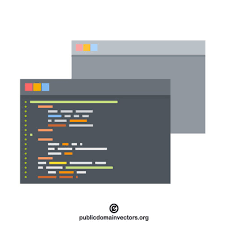



This Polyglot award gives merit to areas with the highest mean number of computer languages their respondents state to hold. As this indicates the area has a pool of diversly talented data professionals. 

According to Towards Data Science over 600 programming languages are used within the data industry.
 
This award was created using the responses from the survey question “What programming languages do you use on a regular basis? (Select all that apply)”.  The options included in our metric were: Python, R, SQL, C, C++, Java, JavaScript, Julia, Swift, Bash, MATLAB and Other. 

To calculate the Mean Polyglot Level, we first one hot encoded the responses, then aggregated the total programming languages each respondent stated. Then the mean for the area was calculated to give us the Mean Polyglot Level for that area. 

The bar chart below shows the Mean Polyglot Level of each Country, colour coded to show the lowest (Nigeria), in dark red and the highest (Tunisia) in dark green.


In [ ]:
df = country_data.sort_values(['Mean_Polygot_Level'], ascending=False)

fig = px.bar(df, x="Mean_Polygot_Level", y="Country", color="Mean_Polygot_Level",   
             height=1200, width=900, labels=dict(Country="Country", Mean_Polygot_Level="Mean"),
             color_continuous_scale=px.colors.diverging.RdYlGn, title="Average Number of Computer Languages of Each Respondent By Country")

fig.show()

Most of the countries respondents state they regularly use between 2 and 3 programming languages. 

Nigeria is the lowest with a mean of 1.809 languages, followed by Kazakhstan and Ghana

Only 4 countries have an average greater than 3. These include Algeria, Ethiopia, Morocco, and Tunisia. With the Gold Medal going to Tunisia! Where the respondents have a mean polyglot level of 3.321. 

Overall, we can see that each country does have similar levels of expertise in multiple programming languages. 

We can focus on countries in need of most improvement with the sunburst chart below. 


In [ ]:
# Sunburst Chart Mean Polyglot Level
df = country_data
df = df.rename(columns={'Polygot_Rank': 'Polygot Award Rank '})
fig = px.sunburst(df, path=['Continent', 'Country'], values='Polygot Award Rank ',
                  color='Polygot Award Rank ', hover_data=['Country'],
                  title = "Sunburst Chart - Mean Polyglot Level" ,
                  color_continuous_scale='Turbo'
                  )
fig.show()

The countries with the lowest rank for the Polyglot Award was Nigeria Ghana, Kazakhstan and Singapore. In terms of continents Africa is the most concerning overall, as it has the highest total rank sum of each continent with North America and Oceania performing the best. 

The leader board below shows how each country performed!


In [ ]:
# Create Polygot Country Leaderboard

df = country_polygot_data
df['color'] =  np.where((df['Polygot_Rank'] ==1),'gold','whitesmoke') 
df['color'] =  np.where((df['Polygot_Rank'] ==2),'silver',df['color']) 
df['color'] =  np.where((df['Polygot_Rank'] ==3),'burlywood',df['color']) 

header = ['Polyglot Award Rank', 'Country', 'Total Respondents', ' Mean Polyglot Level of Respondents']

fig = go.Figure(data=[go.Table(
    header=dict(values=header,fill_color='blueviolet',align='center', font=dict(color='white', size=12)),

    cells=dict(values=[df.Polygot_Rank, df.Country, df.Total_Respondents, df.Mean_Polygot_Level],
               fill_color=[df.color],align='center'))
])

fig.show()

The Gold Medal as previously discussed goes to Tunisia with an average of 3.321 programming languages amongst their Kaggle respondents. Amazing!

The Silver Medal goes to Morocco with an average of 3.3.

And the Bronze Medal goes to Ethiopia with an average of 3.279. 

All countries respondents are on average a polyglot, apart from Nigeria. 

The rank for each country can also be see in the interactive globe below. 😊 


In [ ]:
# Plot 3D Globe - Polyglot
fig = px.choropleth(geodata, locations="iso_alpha",
                    color="Polygot_Rank", 
                    hover_name="Country", 
                    title="Polyglot Award Rankings", labels={'Polygot_Rank': 'Polygot Award Ranking'},
                    color_continuous_scale=px.colors.diverging.Temps)


fig.update_geos(projection_type="orthographic", projection_rotation=dict(lon=7, lat=30, roll=0),showocean = True , showlakes = True, showrivers = True,rivercolor = 'blueviolet',oceancolor = 'blueviolet',lakecolor = 'blueviolet',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()


<div style="color:blue;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:blue;">

</p>
</div>

# Overall 2021 Kaggle Survey Data Geographic Champions

Now for the overall champion! 

Each award has been accounted for in this final ranking to calculate the winner of the 2021 Kaggle Survey Geographic Showdown!  

To recap, The Overall Winners were calculated by adding the rank they scored in each category together, with equal weighting given to each.  With the winner being the areas that scored the overall lowest total score. 



<div style="width:100%;text-align: center;"> <img align=middle  src="http://upload.wikimedia.org/wikipedia/commons/c/c9/Bg.gif " width="400">

Below we have six polar bar charts totalling all the awards such as the Machine Learning Award (ML), Gender Award (Gender), Total Respondents Award (Total Resp.), the Polyglot Award (Polyglot) and the Future Award (Future). 

These results all create an Overall Award represented by the dark blue segment for each continent.

In [ ]:
# Create polar bar plot showing continent rankings


#Step 1 - Data Prep - Create  rankings results for each continent
continent_data_rankings = continent_data[[ 'Total_Respondents_Rank', 'Gender_Inclusive_Rank', 'ML_3Year_Plus_Rank', 'Under_25_Rank', 'Polygot_Rank', 'Continent_Award']]
#Extract Continents Rankings
africa = continent_data_rankings[:1].values.tolist()
asia = continent_data_rankings[1:2].values.tolist()
europe= continent_data_rankings[2:3].values.tolist()
north_america = continent_data_rankings[3:4].values.tolist()
oceania = continent_data_rankings[4:5].values.tolist()
south_america = continent_data_rankings[5:6].values.tolist()
#Unnest
africa_rank_list = africa[0]
asia_rank_list = asia[0]
europe_rank_list = europe[0]
north_america_rank_list = north_america[0]
oceania_rank_list = oceania[0]
south_america_rank_list = south_america[0]


# Step 2 - Create label list
award_list  = ['Total Resp.', 'Gender', 'ML', 'Future', 'Polygot', 'Overall Award']

#Step 3 - Create colour list
award_color_list = ["turquoise",  'fuchsia', 'grey', 'orange', 'blueviolet', 'blue']
# Create continent ranking lists


#Create polor bar sub plots
fig = make_subplots( 
    rows=3, cols=2, horizontal_spacing=0.2, vertical_spacing= 0.2,
    subplot_titles=( "North America", "Europe", "Asia", "Africa", "South America", "Oceania"),
    specs=[[{"type": "barpolar"}, {"type": "barpolar"}],
           [{"type": "barpolar"}, {"type": "barpolar"}],
           [{"type": "barpolar"}, {"type": "barpolar"}]],)

fig.add_trace(go.Barpolar(theta=award_list, r=north_america_rank_list,  marker_color= award_color_list, subplot = "polar"),row=1, col=1)

fig.add_trace(go.Barpolar(theta=award_list, r=europe_rank_list,   marker_color= award_color_list,  subplot = "polar1"), row=1, col=2)

fig.add_trace(go.Barpolar(theta=award_list, r=asia_rank_list,  marker_color= award_color_list, subplot = "polar2"),row=2, col=1)

fig.add_trace(go.Barpolar(theta=award_list, r=africa_rank_list,  marker_color= award_color_list, subplot = "polar3"),row=2, col=2)

fig.add_trace(go.Barpolar(theta=award_list, r=south_america_rank_list,  marker_color= award_color_list, subplot = "polar4"), row=3, col=1)

fig.add_trace(go.Barpolar(theta=award_list, r=oceania_rank_list,  marker_color= award_color_list, subplot = "polar5"),row=3, col=2)

fig.update_layout(height=1000, width = 700, showlegend=False, title_text="Polar Bar Subplots Showing the Award Ranking Each Continent Achieved")

fig.update_layout(
   polar = dict(radialaxis_range =  [0,  6]),
   polar1 = dict(radialaxis_range = [0, 6]),
   polar2 = dict(radialaxis_range = [0, 6]),
   polar3 = dict(radialaxis_range = [0, 6]),
   polar4 = dict(radialaxis_range = [0, 6]),
   polar5 = dict(radialaxis_range = [0, 6])
)

fig.show()

If we pay attention to the Overall Award, we can see that North America has ranked the best out of all six continents! Awesome! Followed by Europe and Asia.

With Oceania appearing with the largest segment, it has overall performed the poorest. 

However, we have seen throughout the Geographic Showdown some areas perform badly in one metric but great in another. Below is a facet bar chart to show how each country performed in each metric. And shows the Overall 2021 Kaggle Survey Country Geographic Champions!

In [ ]:
#Create Country Award Facet Plot

# Step 1 - Data prep to suit facet chart 
award1 = country_data[['Country', 'Total_Respondents_Rank']]
award1.columns = ['Country', 'Rank']
award1.insert(2, 'Award', 'Total Respondent Award')

award2 = country_data[['Country', 'Respondents_per_Capita_Rank']]
award2.columns = ['Country', 'Rank']
award2.insert(2, 'Award', 'Respondent per Capita Award')

award3 = country_data[['Country', 'Gender_Inclusive_Rank']]
award3.columns = ['Country', 'Rank']
award3.insert(2, 'Award', 'Gender Inclusitvty Award')

award4 = country_data[['Country', 'Under_25_Rank']]
award4.columns = ['Country', 'Rank']
award4.insert(2, 'Award', 'Future Talent Award')

award5 = country_data[['Country', 'ML_3Year_Plus_Rank']]
award5.columns = ['Country', 'Rank']
award5.insert(2, 'Award', 'Machine Learning Award')

award6 = country_data[['Country', 'Polygot_Rank']]
award6.columns = ['Country', 'Rank']
award6.insert(2, 'Award', 'Polygot Award')

award7 = country_data[['Country', 'Country_Award']]
award7.columns = ['Country', 'Rank']
award7.insert(2, 'Award', 'Final Award')

country_data_facet_df = pd.concat([award1, award2, award3, award4, award5, award6, award7 ], ignore_index=True)
country_data_facet_df


#Step 2 - Order plot by final award leaders
country_order = final_leaderboard['Country'].values.tolist()


#Step 3 - Create facet plot
fig = px.bar(country_data_facet_df, x="Country", y="Rank", facet_col = 'Award', color="Rank", facet_col_wrap=1, 
              facet_row_spacing=0.1,facet_col_spacing=0.04,height=900, width=1200,
             category_orders={"Country": country_order},color_continuous_scale=px.colors.diverging.Temps, title="Full Country Awards")
fig.update_layout(template="seaborn")

#Step 4 - Format axis labels
for a in fig.layout.annotations:
    a.text = a.text.split("=")[1]

fig.show()



 We can see the final leader board below showing all the rank values for each award with the Final Overall Geographic Champion Score. The best performing country will have the lowest score and has been sorted into descending order and ranked to create the results.
 
And the winner is...
 

In [ ]:
# Create Total_Respondents_Rank Table

df = final_leaderboard
df['color'] =  np.where((df['Country_Award'] ==1),'gold','whitesmoke') 
df['color'] =  np.where((df['Country_Award'] ==2),'silver',df['color']) 
df['color'] =  np.where((df['Country_Award'] ==3),'burlywood',df['color']) 

header = ['Geographic Champion Award Rank', 'Country', 'Total Respondents Award Rank', 'Respondents per Capita Award Rank', 'Gender Inclusivity Award Rank', 'Future Talent Award Rank', 'Machine Learning Award Rank', 'Polygot Award Rank', 'Overall Geographic Champion Score']

fig = go.Figure(data=[go.Table( 
    header=dict(values=header,fill_color='blue',align='center', font=dict(color='white', size=12)),

    cells=dict(values=[df.Country_Award, df.Country, df.Total_Respondents_Rank, df.Respondents_per_Capita_Rank, df.Gender_Inclusive_Rank, df.Under_25_Rank, df.ML_3Year_Plus_Rank, df.Polygot_Rank, df.Country_Total_Score ],
               fill_color=[df.color],align='center'))
])

fig.show()

The gold medal in The Kaggle Survey Geographic Showdown goes to Taiwan!!!!!

The Silver Medal goes to India!!

And the Bronze Medal goes to The United States of America!

Taiwan has an Overall Geographic Champion Score that is the lowest out of every country in the Kaggle Survey data with 103. Their best category was the Respondents per Capita Award where they placed fourth and had tenth place in the Gender Inclusivity Award. Each other category scored higher than average with their Machine learning Award being their weakest. 

Congratulations to our silver medallist India! Scoring 116 in the Overall Geographic Champion Score and is second place. India best performance was in the Total Respondents award where they score the number 1 in the data and came in second for the Future Talent Award. Overall, India scored highly in most categories however their Machine Learning Award ranking was towards the end of the list at 51. This is still an incredible achievement for India!

Our final bronze medal goes to the United States of America who made it third in our Geographic Champion Award with a score of 118. The US have ranked the second in the world for the Total Respondents Award and score eleventh and twelve for Gender Inclusivity and Machine Learning. However, scored low in the Future Talent Award compared to their other categories with a rank of 48.

Countries that could improve on for next year would be Ethiopia at lowest with an Overall Geographic Champion Score of 318, Ghana with a score of 294, and Kazakhstan with a score of 281.  Ethiopia interestingly does have a very low average of 63 for every award but is third highest ranked for the Polyglot Award. This proves how every country has talent in their own way and have so much potential going forward. 



In [ ]:
# Plot 3D Globe - 2021 Kaggle Survey Overall Geographic Champions!
fig = px.choropleth(geodata, locations="iso_alpha", 
                    color="Country_Award", 
                    hover_name="Country",  labels={'Country_Award': 'Geographic Champion Ranking'},
                    title = "Overall 2021 Geographic Champions Rankings!",
                    color_continuous_scale=px.colors.diverging.Temps)



fig.update_geos(projection_type="orthographic",projection_rotation=dict(lon=121, lat=22, roll=0), showocean = True , showlakes = True, showrivers = True,rivercolor = 'blue',oceancolor = 'blue',lakecolor = 'blue',showcountries =True) 
fig.update_layout(template="plotly_dark")
fig.show()

# Conclusion

## Congratulations North America! 

## And Congratulations Taiwan!  恭喜台灣！


How well did your country perform? 

Please comment with your country flag emoji in the section below

Do you agree with each of our metrics? Are there any others which you would include? Please comment below if you think so. One which we thought could be useful, but data was not included in the survey was race, so one could make a metric of race diversity. 

Finally we hope you enjoyed our 2021 Kaggle geographic showdown project! :)  Please like if so, and we can try use this analysis each year to see how the data community evolves through time!


We hope you enjoyed our analysis and had interactive fun along the way! 

# Sources


Here are some of links to sources we used during the project, or one we thought were particulary useful!

##### 
## Gifs and Images
##### Links to all Gifs and Images can be found under their code cell
##### 
## Dataset
##### Population Dataset https://www.kaggle.com/tanuprabhu/population-by-country-2020/metadata
##### 
## Recommended Reads and References
##### Analytics Insight - Countries Which Hold the Greatest Opportunities for Data Scientists: https://www.analyticsinsight.net/countries-which-hold-the-greatest-opportunities-for-data-scientists/
##### Book of Achievers - Siddharth Srivastav Pilli: https://bookofachievers.com/articles/siddharth-srivastav-pilli
##### Business Clusters Advantages - http://ithuteng.ub.bw/handle/10311/866
##### How to build a Sankey Chart https://stackoverflow.com/questions/50486767/plotly-how-to-draw-a-sankey-diagram-from-a-dataframe
##### How to Lie with Maps https://www.goodreads.com/book/show/1005549.How_to_Lie_with_Maps
##### Oxford Insights - Government AI Readiness Index 2020: https://www.oxfordinsights.com/government-ai-readiness-index-2020
##### Polar Charts https://plotly.com/python/polar-chart/https://plotly.com/python/polar-chart/
##### Plotly Chart Examples https://plotly.com/python/
##### Sankey Chart Plotly https://plotly.com/python/sankey-diagram/
##### Stitch Data - The State of Data Science: https://www.stitchdata.com/resources/the-state-of-data-science/
##### Towards Data Science - Top 10 in Demand Programming Languages to Learn in 2020:https://towardsdatascience.com/top-10-in-demand-programming-languages-to-learn-in-2020-4462eb7d8d3e
##### World Economic Forum - Global Gender Gap Report: (https://www3.weforum.org/docs/WEF_GGGR_2020.pdf)

